# Predict the housing price for Boston housing price problem
### Step1: Import all the required libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

### Step2: Load dataset
#### The dataset is, in fact, not in CSV format in the UCI Machine Learning Repository. The attributes are instead separated by whitespace. We can load this easily using the pandas library. Then split the input (X) and output (Y) attributes, making them easier to model with Keras and scikit-learn.

In [2]:
dataframe = pd.read_csv("https://raw.githubusercontent.com/daudayal1987/aiandml/refs/heads/main/housing_boston.csv", delim_whitespace=True, header=None)
dataset = dataframe.values

X = dataset[:,0:13]
Y = dataset[:,13]

#Create train, validation and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, Y)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)


/tmp/ipython-input-2-3644829609.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv("https://raw.githubusercontent.com/daudayal1987/aiandml/refs/heads/main/housing_boston.csv", delim_whitespace=True, header=None)


In [3]:
X_train.shape

(284, 13)

In [4]:
X_test.shape

(127, 13)

In [5]:
X_valid.shape

(95, 13)

In [6]:
y_train.shape

(284,)

In [7]:
y_test.shape

(127,)

In [8]:
y_valid.shape

(95,)

### Step3: Define model



In [9]:
#define layers
hidden_layer1 = Dense(13, input_shape=(13,), kernel_initializer="normal", activation="relu")
output_layer = Dense(1, kernel_initializer="normal")

#define model
model = Sequential()

#add layers to model
model.add(hidden_layer1)
model.add(output_layer)

#compile model
model.compile(loss="mean_squared_error", optimizer="adam", metrics=[tf.keras.metrics.RootMeanSquaredError(), 'mean_absolute_percentage_error'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Step4: Print metadata for model

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 13)             │           182 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            14 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 196 (784.00 B)

 Trainable params: 196 (784.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
for i, layer in enumerate(model.layers):
    if hasattr(layer, 'kernel_initializer'):
        print(f"Layer {i} - {layer.name}:")
        print("  Kernel Initializer:", layer.kernel_initializer)
        print()

Layer 0 - dense:
  Kernel Initializer: <keras.src.initializers.random_initializers.RandomNormal object at 0x7eb238950bd0>

Layer 1 - dense_1:
  Kernel Initializer: <keras.src.initializers.random_initializers.RandomNormal object at 0x7eb238965b50>



In [12]:
print("\n📌 Initial Weights:")
for layer in model.layers:
    weights = layer.get_weights()
    if weights:
        print(f"Layer {layer.name} weights:\n", weights[0])
        print(f"Layer {layer.name} biases:\n", weights[1])


📌 Initial Weights:
Layer dense weights:
 [[-0.06920469 -0.06236402  0.01105515 -0.03766411  0.02476395 -0.01188209
   0.01767804  0.10316224  0.05976937 -0.04676432 -0.08988713 -0.02742209
  -0.0225722 ]
 [ 0.02751539 -0.05968232 -0.01143575 -0.02216029 -0.01665729  0.00559409
  -0.06341629  0.01194587 -0.03498967 -0.0483394   0.05423133  0.05664941
   0.02678415]
 [ 0.02367077  0.02428091  0.00980269 -0.08603931 -0.05091792 -0.07970598
   0.00883933  0.00329702 -0.05221777  0.10882317 -0.01770207 -0.00744867
   0.05168195]
 [ 0.02397082 -0.01848745 -0.02448771 -0.04807844 -0.00520465 -0.03938622
  -0.05873257  0.05604164 -0.11620227  0.01042347  0.05876712  0.07122754
  -0.04367523]
 [ 0.00306108 -0.00442269  0.01429711  0.0008184   0.01075074  0.03329502
   0.02922511  0.0076369   0.03723855 -0.01148918 -0.05889487 -0.00422449
   0.06377392]
 [-0.06497767 -0.02284758  0.01897802  0.05981157  0.00947354 -0.02067119
   0.00892619  0.01421928  0.09761908  0.0497951  -0.0288082   0.0412

### Step5: Train the model

In [13]:
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_valid, y_valid))

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - loss: 493.5554 - mean_absolute_percentage_error: 87.0283 - root_mean_squared_error: 22.1465 - val_loss: 197.3186 - val_mean_absolute_percentage_error: 45.1247 - val_root_mean_squared_error: 14.0470
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 169.5871 - mean_absolute_percentage_error: 46.5936 - root_mean_squared_error: 12.9543 - val_loss: 122.9906 - val_mean_absolute_percentage_error: 41.0569 - val_root_mean_squared_error: 11.0901
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 127.7243 - mean_absolute_percentage_error: 45.3153 - root_mean_squared_error: 11.2710 - val_loss: 106.4553 - val_mean_absolute_percentage_error: 34.2463 - val_root_mean_squared_error: 10.3177
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 99.9461 - mean_absolute_percentage_error: 36.1193 - root_mean_squared_error: 9.9075 - val_loss: 92.9154 - val_mean_absolute_percentage_error: 27.7805 - val_root_mean_squared_error: 9.639

### Step 6: Evaluate the model

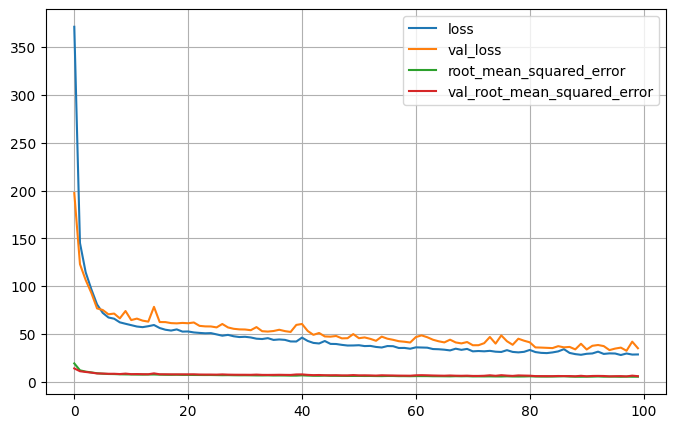

In [14]:
pd.DataFrame(history.history)[['loss', 'val_loss', 'root_mean_squared_error', 'val_root_mean_squared_error']].plot(figsize=(8,5))
plt.grid(True)
plt.show()

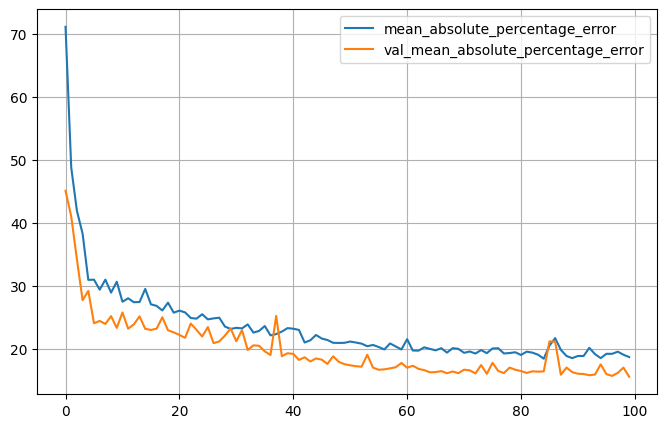

In [15]:
pd.DataFrame(history.history)[['mean_absolute_percentage_error', 'val_mean_absolute_percentage_error']].plot(figsize=(8,5))
plt.grid(True)
plt.show()

In [16]:
#evaluate the model
scores = model.evaluate(X_test, y_test)
print("metrices", model.metrics_names)
print(scores)
# print("\n%s: %.2f%%" % (model.metrics_names[0], scores))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 27.5851 - mean_absolute_percentage_error: 17.9909 - root_mean_squared_error: 5.2365
metrices ['loss', 'compile_metrics']
[29.235212326049805, 5.406959533691406, 18.357421875]


In [17]:
for layer in model.layers:
    print(f"Layer: {layer.name}")
    weights = layer.get_weights()
    if weights:
        print(f"  Weights shape: {weights[0].shape}")
        print(f"  Weights: \n{weights[0]}")
        print(f"  Biases shape: {weights[1].shape}")
        print(f"  Biases: \n{weights[1]}")
    else:
        print("  No weights (e.g., Dropout or Flatten layer)")

Layer: dense
  Weights shape: (13, 13)
  Weights: 
[[ 1.09522231e-01 -2.25664645e-01 -9.01788357e-04 -1.97198197e-01
  -2.03085780e-01 -1.58446759e-01 -1.16153121e-01  9.80032906e-02
   5.97693734e-02  1.01898216e-01 -2.39563480e-01 -1.68276906e-01
  -3.09118126e-02]
 [ 3.54548618e-02 -4.47167223e-03 -1.14357527e-02  3.52688730e-02
   3.42843793e-02  7.94735700e-02  6.70237318e-02  1.19458688e-02
  -3.49896699e-02 -7.54589438e-02  1.15546055e-01  9.00839865e-02
   2.67841462e-02]
 [-1.04782902e-01  1.51237771e-01 -1.33516442e-03  2.49320045e-02
   2.03884263e-02 -4.40945253e-02  8.84419605e-02 -1.86438009e-03
  -5.22177704e-02 -1.99939590e-02  2.72203051e-02  1.19130462e-01
   4.37803157e-02]
 [-9.40290093e-01  9.38896477e-01 -2.44877115e-02  7.81064153e-01
   9.45253551e-01  9.19150054e-01  1.00063586e+00  5.60416356e-02
  -1.16202272e-01 -7.49424398e-01  9.23321366e-01  9.79928970e-01
  -4.36752252e-02]
 [-1.93468064e-01  2.20804676e-01  2.80912244e-03  1.95332304e-01
   2.09922001e-

In [18]:
all_weights = model.get_weights()
for i, param in enumerate(all_weights):
    print(f"Param {i} shape: {param.shape}\n{param}\n")

Param 0 shape: (13, 13)
[[ 1.09522231e-01 -2.25664645e-01 -9.01788357e-04 -1.97198197e-01
  -2.03085780e-01 -1.58446759e-01 -1.16153121e-01  9.80032906e-02
   5.97693734e-02  1.01898216e-01 -2.39563480e-01 -1.68276906e-01
  -3.09118126e-02]
 [ 3.54548618e-02 -4.47167223e-03 -1.14357527e-02  3.52688730e-02
   3.42843793e-02  7.94735700e-02  6.70237318e-02  1.19458688e-02
  -3.49896699e-02 -7.54589438e-02  1.15546055e-01  9.00839865e-02
   2.67841462e-02]
 [-1.04782902e-01  1.51237771e-01 -1.33516442e-03  2.49320045e-02
   2.03884263e-02 -4.40945253e-02  8.84419605e-02 -1.86438009e-03
  -5.22177704e-02 -1.99939590e-02  2.72203051e-02  1.19130462e-01
   4.37803157e-02]
 [-9.40290093e-01  9.38896477e-01 -2.44877115e-02  7.81064153e-01
   9.45253551e-01  9.19150054e-01  1.00063586e+00  5.60416356e-02
  -1.16202272e-01 -7.49424398e-01  9.23321366e-01  9.79928970e-01
  -4.36752252e-02]
 [-1.93468064e-01  2.20804676e-01  2.80912244e-03  1.95332304e-01
   2.09922001e-01  2.21156955e-01  2.35779